In [119]:
import random
import numpy as np
import pandas as pd
from os import system


#name,peso,precio
producto= [
["map",9,150],
["compass",13,35],
["water",153,200],
["sandwich",50,160],
["glucose",15,60],
["tin",68,45],
["banana",27,60],
["apple",39,40],
["cheese",23,30],
["beer",52,10],
["suntan cream",11,70],
["camera",32,30],
["T-shirt",24,15],
["trousers",48,10],
["umbrella",73,40],
["waterproof trousers",42,70],
["waterproof overclothes",43,75],
["note-case",22,80],
["sunglasses",7,20],
["towel" ,18,12],
["socks",4,50],
["book",30,10]]

numCrom=len(producto);
pesoMax=400;
hijosPorPadre=2
vecSeleccion=list()
new_individuos=list()

class inidividuo:
  def __init__(self):
    self.genes=[]
    self.fenotipo=0
    self.adp=0.0#aptitud
    self.pi=0.0#
    self.qi=0.0#
    #
  
  def generarIndividuo(self,ind):#ind= 1= poblacion inicial 0= hijos
    salir=ind
    genAux=[1 for i in range(0,numCrom)]
    while(salir):
      #print("ciclado gen ind")
      for i in range(0,numCrom):genAux[i]=random.randint(0,1);
      if self.adaptacion(genAux,1)<=pesoMax:
        salir=0
    self.genes=genAux.copy();
    self.fenotipo=self.adaptacion(genAux,1);
    self.adp=self.adaptacion(genAux,2);

  def adaptacionHijos(self):
    self.fenotipo=self.adaptacion(self.genes,1);
    self.adp=self.adaptacion(self.genes,2)


  def adaptacion(self,genAux,indice):#indice 1=peso 2=precio
    suma=0;
    for i in range(0,numCrom):
      #print("ciclado adaptacion")
      suma= (genAux[i]*producto[i][indice])+suma;
      #print(suma)
    return suma;
  def mostrarPoblacion(self):
    print(self.genes,self.fenotipo,self.adp,self.pi,self.qi)
  
  def mut(self):#obtener el num de prod para la mutacion
    suma=1;cont=1;salir=1;
    #valorSinIndice=self.adaptacion(gen_aux,1)
    gen_aux=self.genes.copy()
    while(salir):
      #genero num random para la mutacion
      rC= random.randint(0,numCrom-1)
      gen_aux[rC]=int(not(gen_aux[rC]))
      peso=self.adaptacion(gen_aux,1)
      if(peso<pesoMax):
        self.genes=gen_aux
        salir=0
        break

    #print("Mutacion")
    #print(self.genes)
    #print("-------")

        


def inicializarParmsForSeleccion(numIndividuos):
  sum=0
  for i in range(0,numIndividuos):
    #print("ciclado ini parms")
    sum= pob_inicial[i].fenotipo+sum;
  for i in range(0,numIndividuos):
   # print("ciclado ini parms 2")
    pob_inicial[i].pi=pob_inicial[i].fenotipo/sum
    if i==0: pob_inicial[i].qi=pob_inicial[i].pi
    else: pob_inicial[i].qi=pob_inicial[i-1].qi+pob_inicial[i].pi

#FIN CLASE
def generarPoblacion(numIndividuos):
  cont=0;
  copia=1
  while(cont!=numIndividuos):
    #print("ciclado gen poblacion ")
    n= inidividuo()
    n.generarIndividuo(1);
    for i in range(0,len(pob_inicial)):
      #print(pob_inicial[i].genes)
      if n.genes==pob_inicial[i].genes:
        copia=0        
    if(cont==0 or copia):
      pob_inicial.append(n) 
      cont=cont+1;
    copia=1;
    
def seleccionRuleta(numIndividuos):
  while(len(vecSeleccion)!=numIndividuos):
    #print("ciclado slec ruleta")
    #print("num ind: ",numIndividuos)
    #print("len vec: ",len(vecSeleccion))
    ran = random.uniform(0,1)
    for i in range(0, numIndividuos):
      if(ran>=pob_inicial[i].qi):
        #se valida que no se seleccione el mismo padre en la pareja
        if((len(vecSeleccion)%2)!=0):
          if(vecSeleccion[len(vecSeleccion)-1]==i):
            break;
        vecSeleccion.append(i)
        break;
      if(i==numIndividuos-1 and len(vecSeleccion)!=numIndividuos):
          #se vakuda que no se seleccione el mismo como padre y madre
          if((len(vecSeleccion)%2)!=0):
            if(vecSeleccion[len(vecSeleccion)-1]==i):
              break;                
          vecSeleccion.append(i);
        

def ordenar(parm):
  aux= inidividuo()
  for i in range(0, len(pob_inicial)):
    for j in range(0, len(pob_inicial)): 
        if(pob_inicial[i].adp>pob_inicial[j].adp):
          aux=pob_inicial[i]
          pob_inicial[i]=pob_inicial[j]
          pob_inicial[j]=aux      

def SeleccionGerarquica(numIndividuos):
  ordenar(0); 
  seleccionRuleta(numIndividuos); 
  #print(vecSeleccion) 


def cruza(numIndividuos):
  for i in range(0,len(vecSeleccion),2):
    rC=random.uniform(0,1)
    if(rC<.9):
      new_individuos.append(inidividuo())
      tam=len(new_individuos)-1
      new_individuos[tam].generarIndividuo(0)
      #rC= random.randint(1,numCrom);
      rC=3
      generarCruza(tam,i,0,rC)
      generarCruza(tam,i+1,rC,numCrom)
      new_individuos[tam].adaptacionHijos()
      if new_individuos[tam].fenotipo>pesoMax:
        new_individuos.pop()

def generarCruza(iH,iP,Ii,If):#indice Hijo, Ipadre, IndiceInicio,Ind fin
  for i in range(Ii,If):
    new_individuos[iH].genes[i]=pob_inicial[vecSeleccion[iP]].genes[i]  
      
    

def mutacion():
  #print("si entra mutacion")
  #print(len(new_individuos))
  for i in range(0,len(new_individuos)):
    #print("si entra al ciclo")
    pM= random.uniform(0,1)
    if(pM<.50):
      #print("si entraaaaaaaa")
      new_individuos[i].mut()
      new_individuos[i].adaptacionHijos()
      #print("des mutacion",new_individuos[i].genes)
          
def elitismo(numIndividuos):
  pob_inicial.extend(new_individuos)
  ordenar(3)
  while(numIndividuos!=(len(pob_inicial))):pob_inicial.pop()

numIndividuos=100;
generaciones=100   
def main():
  global pob_inicial
  pob_inicial=list()
  generarPoblacion(numIndividuos)
  global best_individuo
  best_individuo=[]
  for i in range(0,generaciones):
    inicializarParmsForSeleccion(numIndividuos);
    #seleccionRuleta(numIndividuos)
    SeleccionGerarquica(numIndividuos)
    cruza(numIndividuos)
    mutacion()
    elitismo(numIndividuos);
    best_individuo.append(pob_inicial[0].adp)
    inicializarParmsForSeleccion(numIndividuos);
    #print("Iteracion: ",i)
    #system("cls") 
    vecSeleccion[:]=[]
    new_individuos[:]=[]
    #del vecSeleccion
    #del new_individuos

  print("................")
  print("Las 10 mejores soluciones")
  for i in range(0,10):
    pob_inicial[i].mostrarPoblacion() 
    
 

random.seed(50)
#50=142
#55 1022
#60 1045 100 ind

main()


#maximizar la ganancia tomando en cunebta las restricciones 


................
Las 10 mejores soluciones
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.01
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.02
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.03
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.04
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.05
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.060000000000000005
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.07
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.08
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.09
[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0] 396 1030 0.01 0.09999999999999999


Para 100 generaciones y 100 individuos


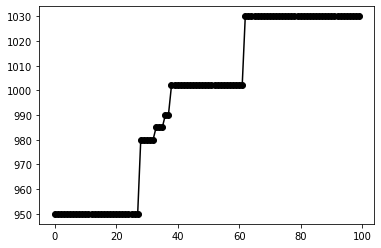

In [126]:
#print(best_individuo)
print("Para {} generaciones y {} individuos".format(generaciones,numIndividuos))
import matplotlib.pyplot as plt

t3 = np.asarray(best_individuo)

plt.plot(t3,'o-k')
plt.show()